In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.spatial import ConvexHull

%matplotlib notebook

In [2]:
# Generate random dots
dots = np.random.rand(3, 10) * 100 # Shape ndot * ndim

### Convex Mesh

In [25]:
# Function for plotting the convex of 
def convex_mesh(dots):
    
    # compute the convex hull of the points
    cvx = ConvexHull(dots.T)

    # cvx.simplices contains an (nfacets, 3) array specifying the indices of the vertices for each simplical facet
    tri = Triangulation(dots[0], dots[1], triangles=cvx.simplices)

    # Visualization
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    ax.plot_trisurf(tri, dots[2]) # Plot the triangle
    ax.scatter(*dots, color='r') # plot all the dots

    plt.draw()

<IPython.core.display.Javascript object>


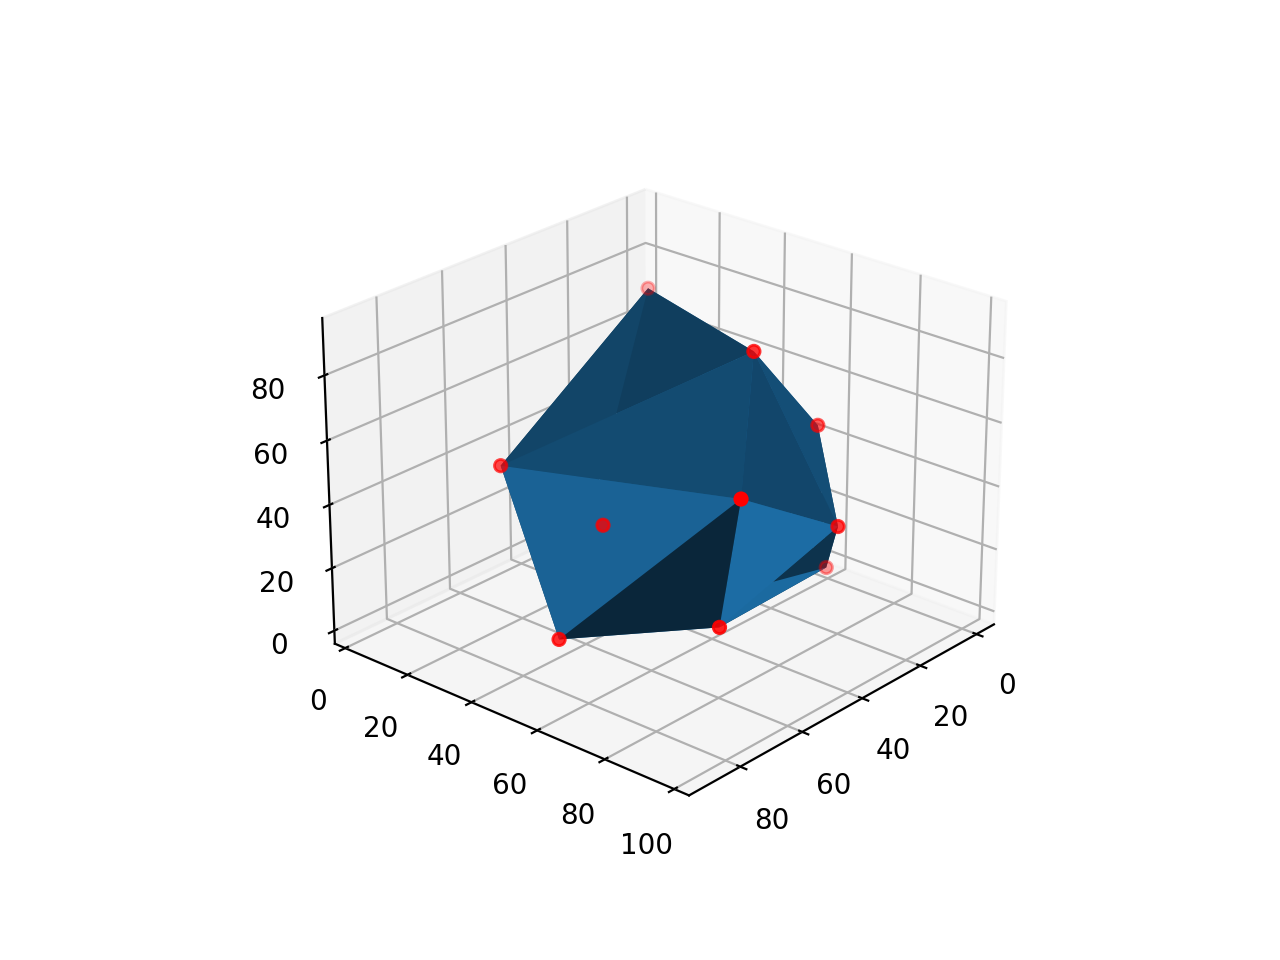

In [26]:
convex_mesh(dots)

### Concave Mesh

In [ ]:
import alphashape
import matplotlib.pyplot as plt
from descartes import PolygonPatch

In [27]:
def concave_mesh(dots, alpha = None):
    
    if not alpha:
        # Alpha control how concave the graph is 
        alpha = 0.95 * alphashape.optimizealpha(points) 
        
    # Create a concave hull
    alpha_shape = alphashape.alphashape(dots, alpha)
    
    # Visualization
    #alpha_shape.show()
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(*zip(*alpha_shape.vertices), triangles=alpha_shape.faces)
    ax.scatter(*dots.T, color='r') # plot all the dotss
    plt.show()
    

In [28]:
concave_mesh(dots.T)

<IPython.core.display.Javascript object>

TypeError: multiple values for argument 's'